In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [4]:
img_width = 150
img_height = 150

train_data_dir = 'B:/img_data/train'
validation_data_dir = 'B:/img_data/validation'
train_samples = 120
validation_samples = 30
epochs = 5
batch_size = 20

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [5]:
model2 = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model2.add(Conv2D(32, (3, 3), input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

In [6]:
import keras
from keras import optimizers
model2.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [8]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 456 images belonging to 2 classes.


In [11]:
print(train_generator.class_indices)
#{'Cat': 0, 'Dog': 1}
imgs, labels = next(train_generator)

{'cats': 0, 'dogs': 1}


In [12]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
0.0


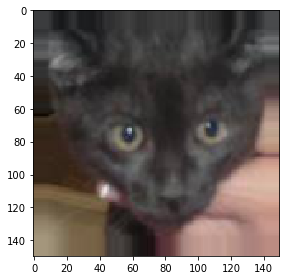

0.0


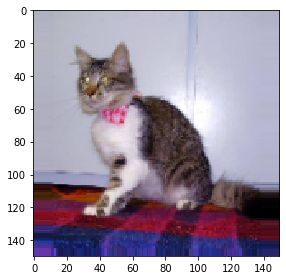

1.0


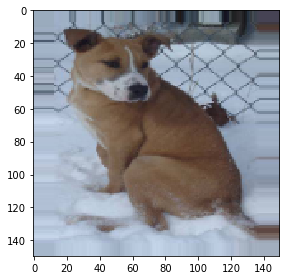

1.0


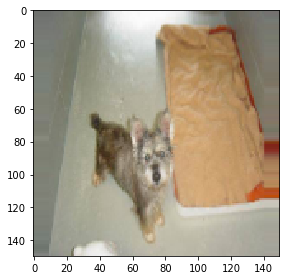

1.0


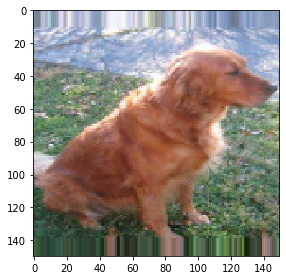

0.0


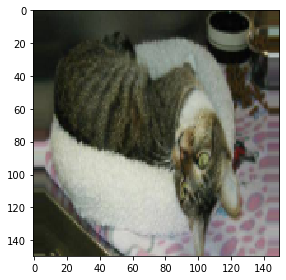

0.0


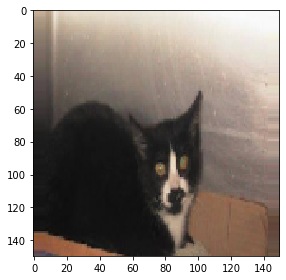

0.0


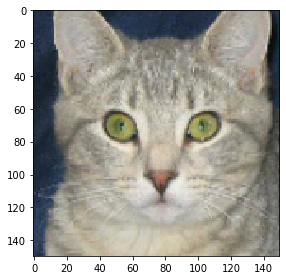

0.0


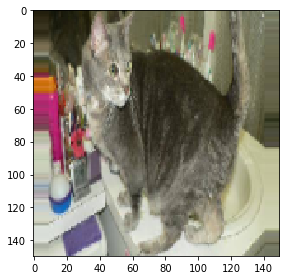

1.0


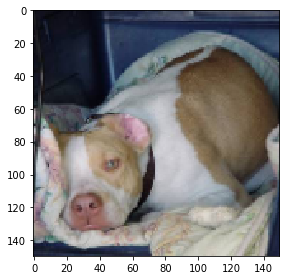

1.0


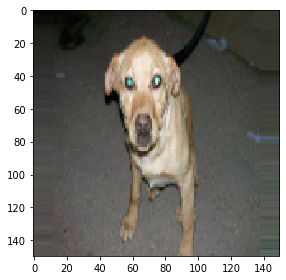

0.0


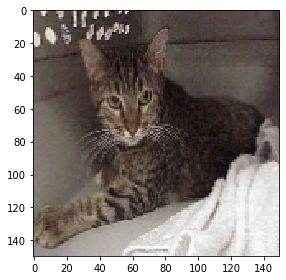

0.0


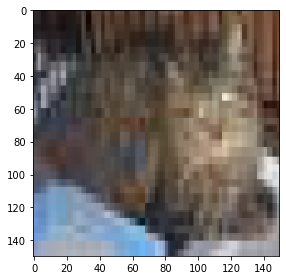

0.0


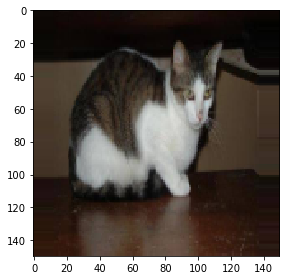

1.0


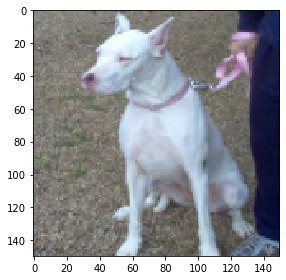

1.0


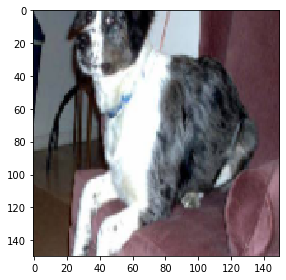

0.0


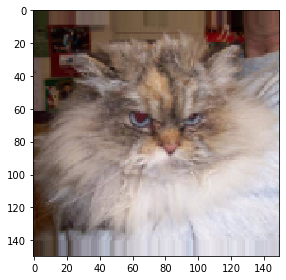

1.0


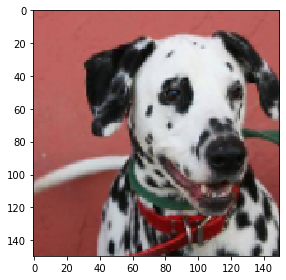

1.0


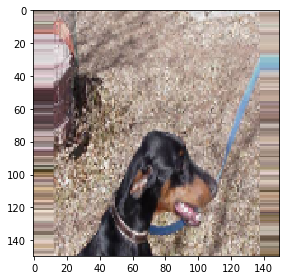

1.0


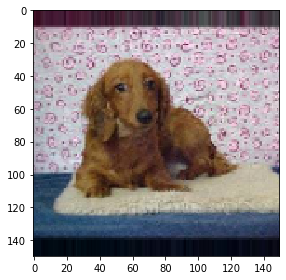

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [14]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 121 images belonging to 2 classes.


In [15]:
history = model2.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
6/6 [==============================] - 3s 565ms/step - loss: 0.6949 - accuracy: 0.5500 - val_loss: 0.7159 - val_accuracy: 0.4000
Epoch 2/5
6/6 [==============================] - 3s 449ms/step - loss: 0.6931 - accuracy: 0.5603 - val_loss: 0.7782 - val_accuracy: 0.2500
Epoch 3/5
6/6 [==============================] - 3s 448ms/step - loss: 0.7024 - accuracy: 0.5431 - val_loss: 0.6929 - val_accuracy: 0.5500
Epoch 4/5
6/6 [==============================] - 3s 454ms/step - loss: 0.6929 - accuracy: 0.4833 - val_loss: 0.6906 - val_accuracy: 0.6000
Epoch 5/5
6/6 [==============================] - 3s 444ms/step - loss: 0.6972 - accuracy: 0.5086 - val_loss: 0.6890 - val_accuracy: 0.6500


In [16]:
predict_dir_path='B:/img_data/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['3997.jpg', '3998.jpg', '3999.jpg', '4000.jpg', '4001.jpg', '4002.jpg', '4003.jpg', '4004.jpg', '4005.jpg', '4006.jpg', '4007.jpg', '4008.jpg', '4009.jpg', '4010.jpg', '4011.jpg', '4012.jpg', '4013.jpg', '4014.jpg', '4015.jpg', '4016.jpg', '4017.jpg', '4018.jpg', '4019.jpg', '4020.jpg']


In [17]:
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model2.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
3997.jpg: cat
3998.jpg: dog
3999.jpg: dog
4000.jpg: cat
4001.jpg: cat
4002.jpg: dog
4003.jpg: dog
4004.jpg: dog
4005.jpg: cat
4006.jpg: cat
4007.jpg: cat
4008.jpg: dog
4009.jpg: cat
4010.jpg: cat
4011.jpg: cat
4012.jpg: cat
4013.jpg: cat
4014.jpg: cat
4015.jpg: cat
4016.jpg: cat
4017.jpg: cat
4018.jpg: cat
4019.jpg: cat
4020.jpg: dog
Total Dogs : 7
Total Cats : 17
